In [2]:
from sklearn.neural_network import MLPClassifier
import pandas as pd, numpy as np, seaborn as sns


/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
nnModel = MLPClassifier(hidden_layer_sizes=(10,8,10))


In [4]:
#CNN

In [5]:
!pip install keras

     |████████████████████████████████| 378kB 260kB/s eta 0:00:01
     |████████████████████████████████| 51kB 617kB/s eta 0:00:011
     |████████████████████████████████| 51kB 903kB/s eta 0:00:011
     |████████████████████████████████| 266kB 527kB/s eta 0:00:01
     |████████████████████████████████| 3.0MB 111kB/s eta 0:00:01
    Running setup.py install for pyyaml ... done


In [7]:
from keras.datasets import mnist

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
from matplotlib import pyplot as plt


In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11493376/11490434 [==============================] - 43s 4us/step


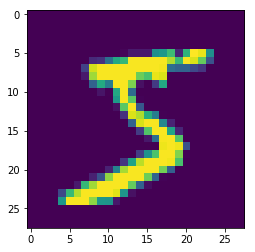

In [10]:
plt.imshow(x_train[0])

In [11]:
x_train[5].shape

(28, 28)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as k

In [20]:
#set image information

k.set_image_data_format('channels_first')
np.random.seed(0)

In [21]:
x_train.shape

(60000, 28, 28)

In [19]:
#image info
channel =1
height = 28
width = 28

In [26]:
#reshape training image data into feature
x_train = x_train.reshape(x_train.shape[0],channel,height,width)
x_test = x_test.reshape(x_test.shape[0],channel,height,width)

In [27]:
#rescale the pixcel data 
train_features = x_train/255
test_feature = x_test/255

In [28]:
#one hot code the target value
train_target = np_utils.to_categorical(y_train)
test_target = np_utils.to_categorical(y_test)

In [30]:
#start neural network 
network = Sequential()
#add a covenlutional layer, filters signifies the number of patches 
network.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(channel,height,width)))

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
#add max pooling layer
network.add(MaxPooling2D(pool_size=(2,2)))

#add flattened layer
network.add(Flatten())

#add a fully connected layer
network.add(Dense(128,activation='relu'))

#add a output layer (it is same as number of classes)
number_classes = test_target.shape[1]
#if doing classification problem use softmax activation function
network.add(Dense(number_classes,activation='softmax'))

In [34]:
#compile the network
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
network.fit(train_features,train_target,epochs=1)

Epoch 1/1
60000/60000 [==============================] - 31s 510us/step - loss: 0.0540 - accuracy: 0.9844


In [36]:
network.predict_classes(test_feature)

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
img = plt.imread("eight.png")

In [ ]:
img.shape[0]